In [307]:
import pdfplumber
import pandas as pd
import requests
import re

In [308]:
pdf = pdfplumber.open("../desktop/2024-25 NHL Regular Season Schedule (By Club).pdf")

# pdf = pdfplumber.open("../desktop/01-practice.pdf")

In [309]:
page = pdf.pages[56]

In [310]:
page.find_tables(table_settings={})	

In [311]:
print(page.extract_text())

National Hockey League
2024-25 Schedule for the Vancouver Canucks
All Times Local Reference C:\nhl2000\S241039.SKD 07/02/2024
GN# Date Time Opponent GN# Date Time Opponent
Wed. Oct 9 7:00 PM Calgary Sat. Jan 11 7:00 PM AT Toronto
Fri. Oct 11 7:00 PM Philadelphia Tue. Jan 14 7:00 PM AT Winnipeg
Tue. Oct 15 7:00 PM AT Tampa Bay Thu. Jan 16 7:00 PM Los Angeles
Thu. Oct 17 7:00 PM AT Florida Sat. Jan 18 7:00 PM Edmonton
Sat. Oct 19 7:00 PM AT Philadelphia Tue. Jan 21 7:00 PM Buffalo
Tue. Oct 22 7:15 PM AT Chicago Thu. Jan 23 7:00 PM AT Edmonton
Sat. Oct 26 7:00 PM Pittsburgh Sat. Jan 25 7:00 PM Washington
Mon. Oct 28 7:00 PM Carolina Mon. Jan 27 6:30 PM AT St. Louis
Wed. Oct 30 7:30 PM New Jersey Wed. Jan 29 8:00 PM AT Nashville
Sat. Nov 2 7:00 PM AT San Jose Fri. Jan 31 7:00 PM AT Dallas
Tue. Nov 5 7:00 PM AT Anaheim Sun. Feb 2 5:00 PM Detroit
Thu. Nov 7 7:30 PM AT Los Angeles Tue. Feb 4 7:00 PM Colorado
Sat. Nov 9 7:00 PM Edmonton Thu. Feb 6 7:30 PM AT San Jose
Tue. Nov 12 7:00 PM Calgar

In [312]:
print(page.extract_text(layout=True))

                                                                                            
                                                                                            
                                                                                            
                                    National Hockey League                                  
                                                                                            
                            2024-25 Schedule for the Vancouver Canucks                      
                           All Times Local Reference C:\nhl2000\S241039.SKD 07/02/2024      
                                                                                            
   GN#      Date      Time      Opponent       GN#      Date       Time     Opponent        
                                                                                            
          Wed. Oct 9  7:00 PM      Calgary            Sat. Jan 11 7:00

In [313]:
im = page.to_image()

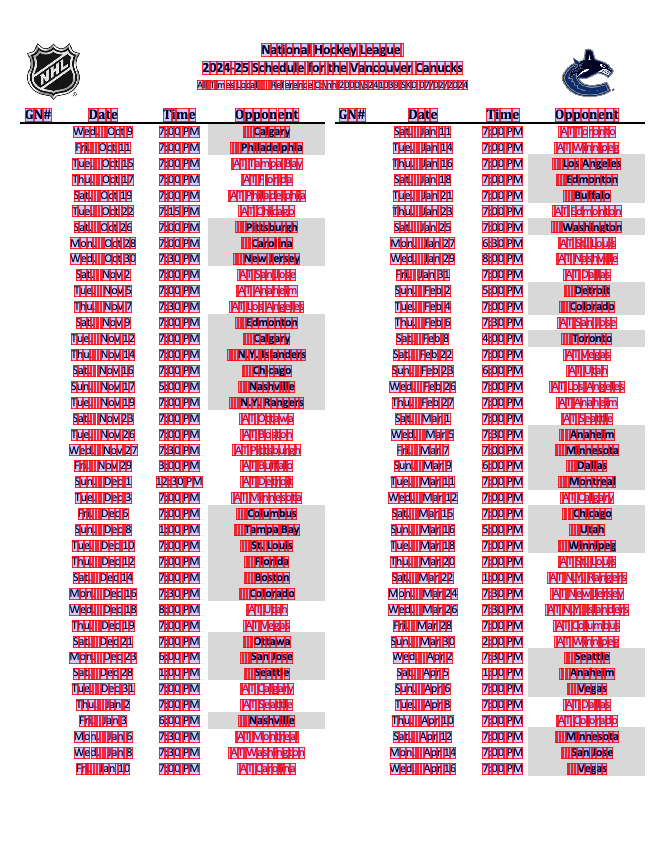

In [314]:
im.reset().draw_rects(page.chars)

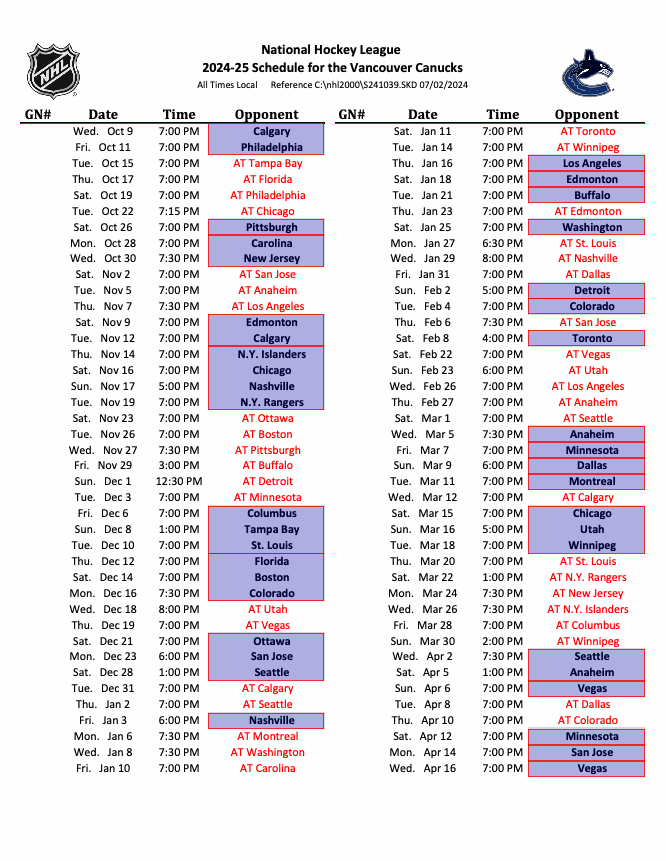

In [315]:
im.reset().draw_rects(page.rects)

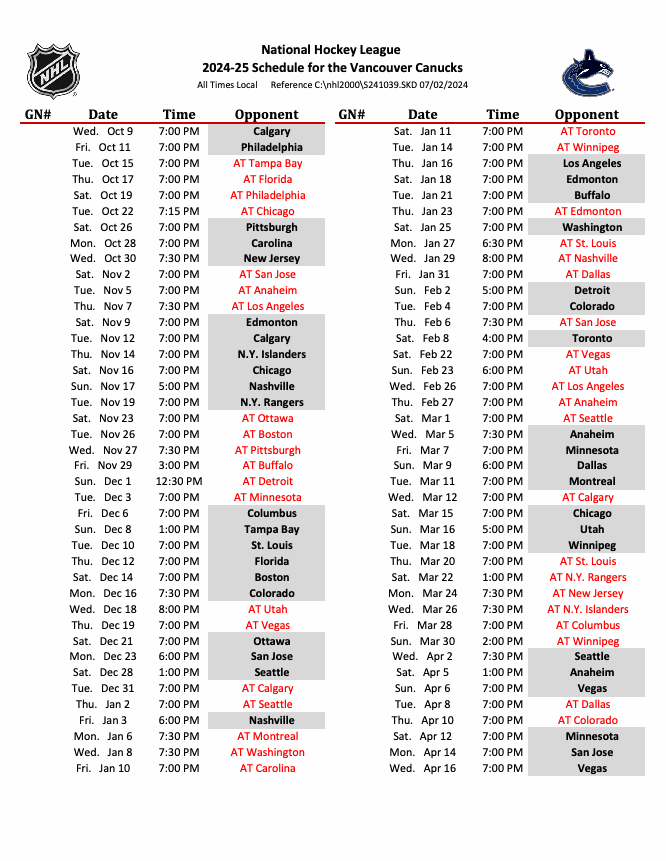

In [316]:
im.reset().draw_lines(page.lines, stroke_width=2)

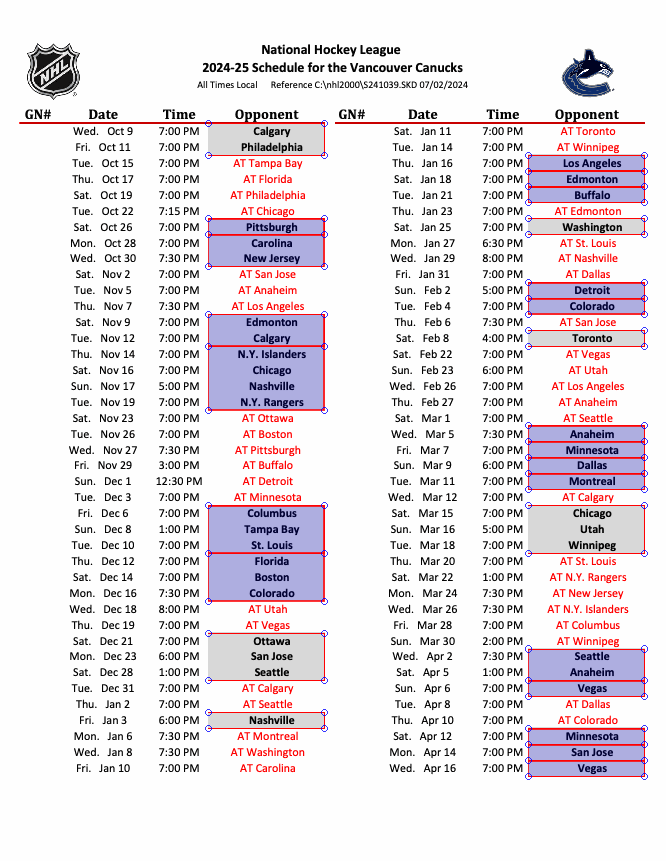

In [317]:
im.reset().debug_tablefinder()

In [318]:
rows = page.extract_table()

pd.DataFrame(rows[1:], columns=rows[0])

,Anaheim
0,Minnesota
1,Dallas
2,Montreal


In [319]:
df = pd.read_csv('2024-25 NHL Regular Season Schedule (By Club) 57.xlsx - Table 1.csv')
df.head(100)

,GN#,Date,Time,Opponent
0,Wed.,Oct 9,7:00 PM,Calgary
1,Fri.,Oct 11,7:00 PM,Philadelphia
2,Tue.,Oct 15,7:00 PM,AT Tampa Bay
3,Thu.,Oct 17,7:00 PM,AT Florida
4,Sat.,Oct 19,7:00 PM,AT Philadelphia
5,Tue.,Oct 22,7:15 PM,AT Chicago
6,Sat.,Oct 26,7:00 PM,Pittsburgh
7,Mon.,Oct 28,7:00 PM,Carolina
8,Wed.,Oct 30,7:30 PM,New Jersey
9,Sat.,Nov 2,7:00 PM,AT San Jose


In [320]:
df.drop([2,3,4,77])

,GN#,Date,Time,Opponent
0,Wed.,Oct 9,7:00 PM,Calgary
1,Fri.,Oct 11,7:00 PM,Philadelphia
5,Tue.,Oct 22,7:15 PM,AT Chicago
6,Sat.,Oct 26,7:00 PM,Pittsburgh
7,Mon.,Oct 28,7:00 PM,Carolina
8,Wed.,Oct 30,7:30 PM,New Jersey
9,Sat.,Nov 2,7:00 PM,AT San Jose
10,Tue.,Nov 5,7:00 PM,AT Anaheim
11,Thu.,Nov 7,7:30 PM,AT Los Angeles
12,Sat.,Nov 9,7:00 PM,Edmonton


In [321]:
df.drop([5,76])

,GN#,Date,Time,Opponent
0,Wed.,Oct 9,7:00 PM,Calgary
1,Fri.,Oct 11,7:00 PM,Philadelphia
2,Tue.,Oct 15,7:00 PM,AT Tampa Bay
3,Thu.,Oct 17,7:00 PM,AT Florida
4,Sat.,Oct 19,7:00 PM,AT Philadelphia
6,Sat.,Oct 26,7:00 PM,Pittsburgh
7,Mon.,Oct 28,7:00 PM,Carolina
8,Wed.,Oct 30,7:30 PM,New Jersey
9,Sat.,Nov 2,7:00 PM,AT San Jose
10,Tue.,Nov 5,7:00 PM,AT Anaheim


In [322]:
pd.set_option('display.max_rows', 500)

In [323]:
df

,GN#,Date,Time,Opponent
0,Wed.,Oct 9,7:00 PM,Calgary
1,Fri.,Oct 11,7:00 PM,Philadelphia
2,Tue.,Oct 15,7:00 PM,AT Tampa Bay
3,Thu.,Oct 17,7:00 PM,AT Florida
4,Sat.,Oct 19,7:00 PM,AT Philadelphia
5,Tue.,Oct 22,7:15 PM,AT Chicago
6,Sat.,Oct 26,7:00 PM,Pittsburgh
7,Mon.,Oct 28,7:00 PM,Carolina
8,Wed.,Oct 30,7:30 PM,New Jersey
9,Sat.,Nov 2,7:00 PM,AT San Jose


In [324]:
df = df.drop([2,3,4,5,9,10,11,76])
df

,GN#,Date,Time,Opponent
0,Wed.,Oct 9,7:00 PM,Calgary
1,Fri.,Oct 11,7:00 PM,Philadelphia
6,Sat.,Oct 26,7:00 PM,Pittsburgh
7,Mon.,Oct 28,7:00 PM,Carolina
8,Wed.,Oct 30,7:30 PM,New Jersey
12,Sat.,Nov 9,7:00 PM,Edmonton
13,Tue.,Nov 12,7:00 PM,Calgary
14,Thu.,Nov 14,7:00 PM,N.Y. Islanders
15,Sat.,Nov 16,7:00 PM,Chicago
16,Sun.,Nov 17,5:00 PM,Nashville


In [325]:
df = df.drop([18,19,20,21,22,23,30,34,35,37,38,39,40,41,45,47,48,49,52,54,55,56,57,58,63,67,68,69,70,71,72,77])
df

,GN#,Date,Time,Opponent
0,Wed.,Oct 9,7:00 PM,Calgary
1,Fri.,Oct 11,7:00 PM,Philadelphia
6,Sat.,Oct 26,7:00 PM,Pittsburgh
7,Mon.,Oct 28,7:00 PM,Carolina
8,Wed.,Oct 30,7:30 PM,New Jersey
12,Sat.,Nov 9,7:00 PM,Edmonton
13,Tue.,Nov 12,7:00 PM,Calgary
14,Thu.,Nov 14,7:00 PM,N.Y. Islanders
15,Sat.,Nov 16,7:00 PM,Chicago
16,Sun.,Nov 17,5:00 PM,Nashville


In [326]:
df = df.reset_index(drop=True)
df

,GN#,Date,Time,Opponent
0,Wed.,Oct 9,7:00 PM,Calgary
1,Fri.,Oct 11,7:00 PM,Philadelphia
2,Sat.,Oct 26,7:00 PM,Pittsburgh
3,Mon.,Oct 28,7:00 PM,Carolina
4,Wed.,Oct 30,7:30 PM,New Jersey
5,Sat.,Nov 9,7:00 PM,Edmonton
6,Tue.,Nov 12,7:00 PM,Calgary
7,Thu.,Nov 14,7:00 PM,N.Y. Islanders
8,Sat.,Nov 16,7:00 PM,Chicago
9,Sun.,Nov 17,5:00 PM,Nashville


In [327]:
df["Game"] = df["Date"] + " (" + df["Opponent"] + ")"
df

,GN#,Date,Time,Opponent,Game
0,Wed.,Oct 9,7:00 PM,Calgary,Oct 9 (Calgary)
1,Fri.,Oct 11,7:00 PM,Philadelphia,Oct 11 (Philadelphia)
2,Sat.,Oct 26,7:00 PM,Pittsburgh,Oct 26 (Pittsburgh)
3,Mon.,Oct 28,7:00 PM,Carolina,Oct 28 (Carolina)
4,Wed.,Oct 30,7:30 PM,New Jersey,Oct 30 (New Jersey)
5,Sat.,Nov 9,7:00 PM,Edmonton,Nov 9 (Edmonton)
6,Tue.,Nov 12,7:00 PM,Calgary,Nov 12 (Calgary)
7,Thu.,Nov 14,7:00 PM,N.Y. Islanders,Nov 14 (N.Y. Islanders)
8,Sat.,Nov 16,7:00 PM,Chicago,Nov 16 (Chicago)
9,Sun.,Nov 17,5:00 PM,Nashville,Nov 17 (Nashville)


In [328]:
df = df.drop(columns=['GN#', 'Date', 'Time', 'Opponent'])
df

,Game
0,Oct 9 (Calgary)
1,Oct 11 (Philadelphia)
2,Oct 26 (Pittsburgh)
3,Oct 28 (Carolina)
4,Oct 30 (New Jersey)
5,Nov 9 (Edmonton)
6,Nov 12 (Calgary)
7,Nov 14 (N.Y. Islanders)
8,Nov 16 (Chicago)
9,Nov 17 (Nashville)


In [329]:
df.to_csv('canucksgames.csv', index=False)


In [330]:
prices_df = pd.read_csv('nucks.csv')
prices_df

,game,upper-goal,upper-centre,lower-goal,lower-centre,club,sportsbar,club-500
0,Oct 9 (Calgary),246,278,348,582,706,468,866
1,Oct 11 (Philadelphia),157,163,206,339,408,274,501
2,Oct 26 (Pittsburgh),188,204,254,414,502,334,616
3,Oct 28 (Carolina),109,115,145,234,279,189,342
4,Oct 30 (New Jersey),138,144,182,288,344,232,420
5,Nov 9 (Edmonton),277,310,400,667,807,533,998
6,Nov 12 (Calgary),133,142,180,294,354,237,432
7,Nov 14 (N.Y. Islanders),109,115,145,234,279,189,342
8,Nov 16 (Chicago),254,276,390,588,714,478,-
9,Nov 17 (Nashville),159,168,214,352,424,284,521


In [331]:
prices_df.dtypes

game            object
upper-goal       int64
upper-centre     int64
lower-goal       int64
lower-centre     int64
club             int64
sportsbar       object
club-500        object
dtype: object

In [332]:
import numpy as np

In [333]:
prices_df = prices_df.replace('-', np.nan)
prices_df

,game,upper-goal,upper-centre,lower-goal,lower-centre,club,sportsbar,club-500
0,Oct 9 (Calgary),246,278,348,582,706,468,866
1,Oct 11 (Philadelphia),157,163,206,339,408,274,501
2,Oct 26 (Pittsburgh),188,204,254,414,502,334,616
3,Oct 28 (Carolina),109,115,145,234,279,189,342
4,Oct 30 (New Jersey),138,144,182,288,344,232,420
5,Nov 9 (Edmonton),277,310,400,667,807,533,998
6,Nov 12 (Calgary),133,142,180,294,354,237,432
7,Nov 14 (N.Y. Islanders),109,115,145,234,279,189,342
8,Nov 16 (Chicago),254,276,390,588,714,478,NaN
9,Nov 17 (Nashville),159,168,214,352,424,284,521


In [334]:
prices_df.dtypes

game            object
upper-goal       int64
upper-centre     int64
lower-goal       int64
lower-centre     int64
club             int64
sportsbar       object
club-500        object
dtype: object

In [335]:
prices_df['sportsbar'] = prices_df['sportsbar'].astype(float)
prices_df['club-500'] = prices_df['club-500'].astype(float)

In [336]:
prices_df.dtypes

game             object
upper-goal        int64
upper-centre      int64
lower-goal        int64
lower-centre      int64
club              int64
sportsbar       float64
club-500        float64
dtype: object

In [337]:
# prices_df['sportsbar'].astype(str).astype(int)

In [338]:
prices_df

,game,upper-goal,upper-centre,lower-goal,lower-centre,club,sportsbar,club-500
0,Oct 9 (Calgary),246,278,348,582,706,468.0,866.0
1,Oct 11 (Philadelphia),157,163,206,339,408,274.0,501.0
2,Oct 26 (Pittsburgh),188,204,254,414,502,334.0,616.0
3,Oct 28 (Carolina),109,115,145,234,279,189.0,342.0
4,Oct 30 (New Jersey),138,144,182,288,344,232.0,420.0
5,Nov 9 (Edmonton),277,310,400,667,807,533.0,998.0
6,Nov 12 (Calgary),133,142,180,294,354,237.0,432.0
7,Nov 14 (N.Y. Islanders),109,115,145,234,279,189.0,342.0
8,Nov 16 (Chicago),254,276,390,588,714,478.0,NaN
9,Nov 17 (Nashville),159,168,214,352,424,284.0,521.0


In [339]:
# prices_df = prices_df.replace(0, '')
# prices_df

In [340]:
# prices_df.dtypes

In [341]:
prices_df['mean'] = prices_df.iloc[:, 1:8].mean(axis=1)
prices_df


,game,upper-goal,upper-centre,lower-goal,lower-centre,club,sportsbar,club-500,mean
0,Oct 9 (Calgary),246,278,348,582,706,468.0,866.0,499.142857
1,Oct 11 (Philadelphia),157,163,206,339,408,274.0,501.0,292.571429
2,Oct 26 (Pittsburgh),188,204,254,414,502,334.0,616.0,358.857143
3,Oct 28 (Carolina),109,115,145,234,279,189.0,342.0,201.857143
4,Oct 30 (New Jersey),138,144,182,288,344,232.0,420.0,249.714286
5,Nov 9 (Edmonton),277,310,400,667,807,533.0,998.0,570.285714
6,Nov 12 (Calgary),133,142,180,294,354,237.0,432.0,253.142857
7,Nov 14 (N.Y. Islanders),109,115,145,234,279,189.0,342.0,201.857143
8,Nov 16 (Chicago),254,276,390,588,714,478.0,NaN,450.000000
9,Nov 17 (Nashville),159,168,214,352,424,284.0,521.0,303.142857


In [342]:
avg_df = prices_df.filter(['game','mean'], axis=1)
avg_df


,game,mean
0,Oct 9 (Calgary),499.142857
1,Oct 11 (Philadelphia),292.571429
2,Oct 26 (Pittsburgh),358.857143
3,Oct 28 (Carolina),201.857143
4,Oct 30 (New Jersey),249.714286
5,Nov 9 (Edmonton),570.285714
6,Nov 12 (Calgary),253.142857
7,Nov 14 (N.Y. Islanders),201.857143
8,Nov 16 (Chicago),450.000000
9,Nov 17 (Nashville),303.142857


In [343]:
avg_df.to_csv('average_game_prices.csv')

In [344]:
prices_df = prices_df.drop(columns=['mean'])
prices_df

,game,upper-goal,upper-centre,lower-goal,lower-centre,club,sportsbar,club-500
0,Oct 9 (Calgary),246,278,348,582,706,468.0,866.0
1,Oct 11 (Philadelphia),157,163,206,339,408,274.0,501.0
2,Oct 26 (Pittsburgh),188,204,254,414,502,334.0,616.0
3,Oct 28 (Carolina),109,115,145,234,279,189.0,342.0
4,Oct 30 (New Jersey),138,144,182,288,344,232.0,420.0
5,Nov 9 (Edmonton),277,310,400,667,807,533.0,998.0
6,Nov 12 (Calgary),133,142,180,294,354,237.0,432.0
7,Nov 14 (N.Y. Islanders),109,115,145,234,279,189.0,342.0
8,Nov 16 (Chicago),254,276,390,588,714,478.0,NaN
9,Nov 17 (Nashville),159,168,214,352,424,284.0,521.0


In [345]:
prices_df[['upper-goal','upper-centre', 'lower-goal', 'lower-centre', 'club', 'sportsbar', 'club-500']].mean()

upper-goal      162.609756
upper-centre    174.829268
lower-goal      222.219512
lower-centre    363.365854
club            439.048780
sportsbar       295.150000
club-500        533.717949
dtype: float64

In [346]:
single_game_avgs = prices_df[['upper-goal','upper-centre', 'lower-goal', 'lower-centre', 'club', 'sportsbar', 'club-500']].mean()
single_game_avgs

upper-goal      162.609756
upper-centre    174.829268
lower-goal      222.219512
lower-centre    363.365854
club            439.048780
sportsbar       295.150000
club-500        533.717949
dtype: float64

In [349]:
single_game_avgs = pd.DataFrame(single_game_avgs)

In [350]:
single_game_avgs

,0
upper-goal,162.609756
upper-centre,174.829268
lower-goal,222.219512
lower-centre,363.365854
club,439.048780
sportsbar,295.150000
club-500,533.717949


In [351]:
single_game_avgs = single_game_avgs.rename(columns={0: 'tm-price'})


In [352]:
single_game_avgs

,tm-price
upper-goal,162.609756
upper-centre,174.829268
lower-goal,222.219512
lower-centre,363.365854
club,439.048780
sportsbar,295.150000
club-500,533.717949


In [354]:
single_game_avgs.insert(1, "sth-price", [61.05, 94.01, 122.70, 210.61, 256.40, 167.27, 317.44], True)
single_game_avgs

,tm-price,sth-price
upper-goal,162.609756,61.05
upper-centre,174.829268,94.01
lower-goal,222.219512,122.70
lower-centre,363.365854,210.61
club,439.048780,256.40
sportsbar,295.150000,167.27
club-500,533.717949,317.44


In [355]:
single_game_avgs.to_csv('sth_vs_tm.csv')